In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math as mymath
from scipy import stats

In [3]:
file = "C:/Users/ppbin/OneDrive/Desktop/Ak Data Analytics23/Datascience/diamonds_new.csv"
data= pd.read_csv(file) #reading file

In [5]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [7]:
data.describe()

,carat,table,x,y,z,price_new
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.731157,5.734526,3.539635,1966.399861
std,0.474428,2.235742,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


In [9]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [10]:
# To check missing values
data.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [14]:
for i in ['carat','table']:
    data[i]=data[i].fillna(data[i].median())

In [15]:
#use 0 to fill with first mode, if there are multiple modes
for i in ['color']:
    data[i]= data[i].fillna(data[i].mode()[0])

In [16]:
# To check missing values
data.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

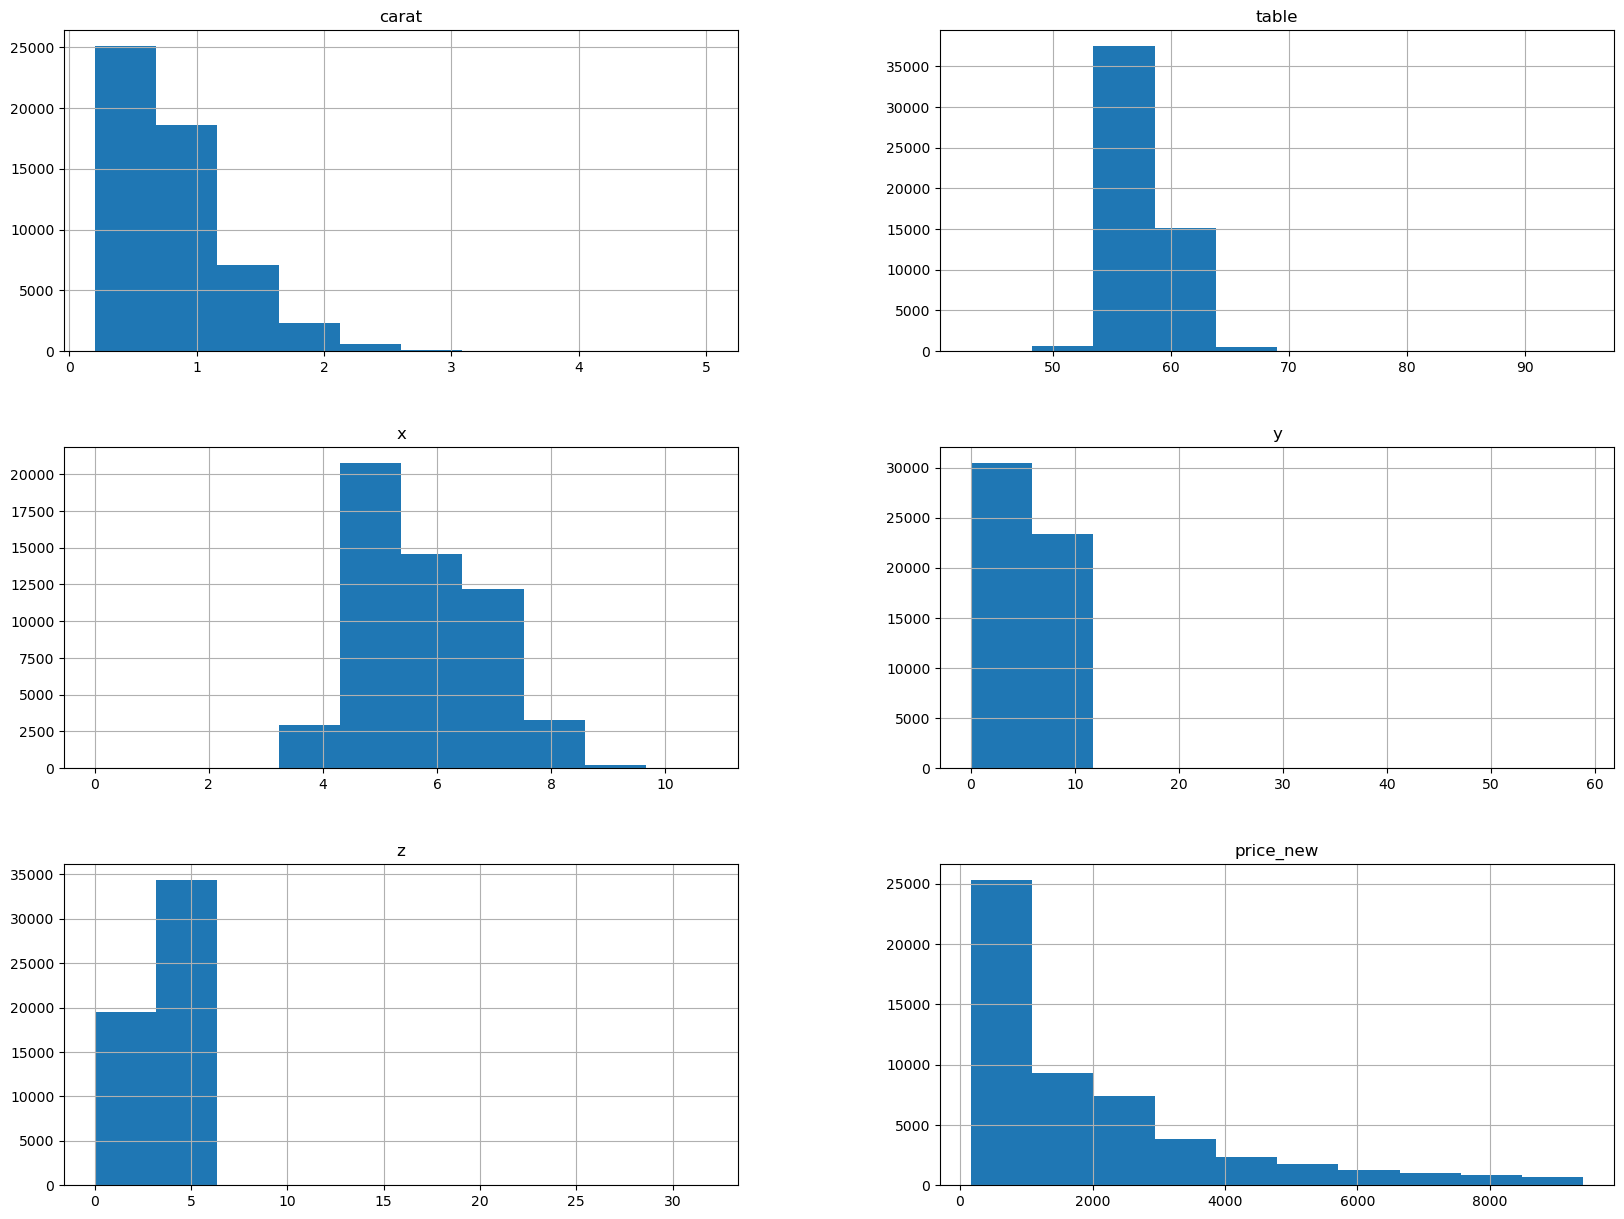

In [17]:
data.hist(figsize=(20,15))
plt.show()

In [18]:
box=data.select_dtypes(include=['float'])

In [19]:
box.columns

Index(['carat', 'table', 'x', 'y', 'z', 'price_new'], dtype='object')

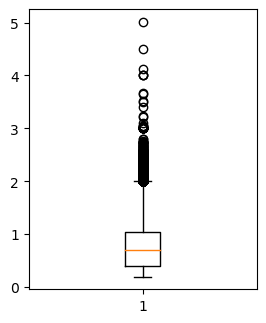

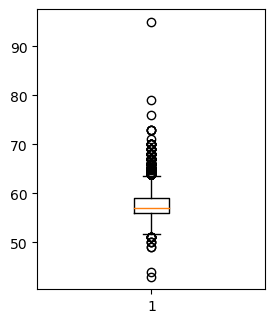

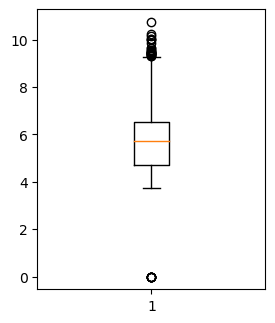

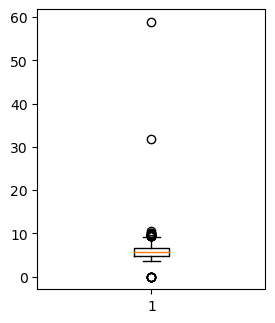

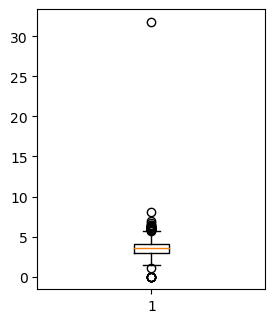

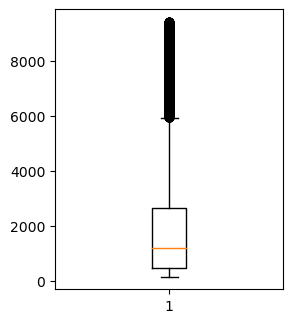

In [20]:
#should use plt.title next time
j=1
for i in ['carat', 'table', 'x', 'y', 'z', 'price_new']:
    plt.figure(figsize=(10,8))
    plt.subplot(2,3,j)
    plt.boxplot(box[i])
    j=j+1
plt.show()

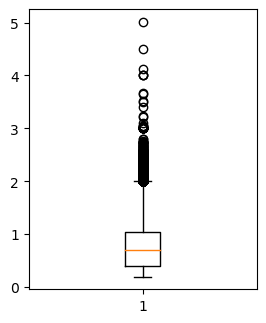

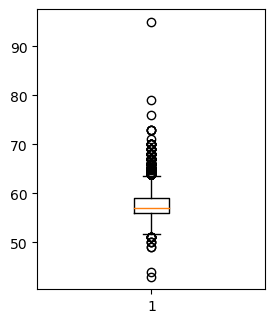

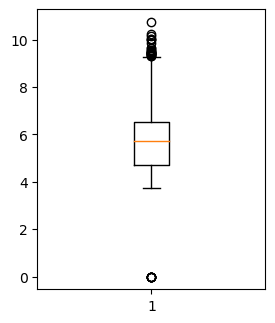

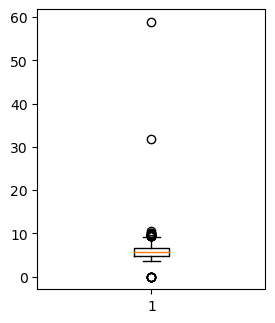

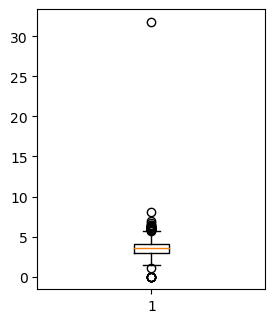

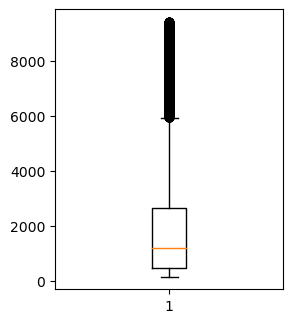

In [21]:
#should use plt.title next time
j=1
for i in ['carat', 'table', 'x', 'y', 'z', 'price_new']:
    plt.figure(figsize=(10,8))
    plt.subplot(2,3,j)
    plt.boxplot(box[i])
    j=j+1
plt.show()

In [40]:
# t test
from scipy.stats import ttest_ind
t_stat, p_value= ttest_ind(data['Sales_before_digital_add(in $)'], data['Sales_After_digital_add(in $)'])

In [23]:
#to remove all the outliers, can use function too..
for i in ['carat', 'table', 'x', 'y', 'z', 'price_new']:
    Q1= np.percentile(data[i],25, interpolation='midpoint')
    Q2= np.percentile(data[i],50, interpolation='midpoint')
    Q3= np.percentile(data[i],75, interpolation='midpoint')
    if Q2== data[i].median():
        IQR= Q3-Q1
        low_lim= Q1-1.5*IQR
        up_lim= Q3+1.5*IQR
        outlier =[]
        for x in data[i]:
            if(x<low_lim)or (x>up_lim):
                outlier.append(x)
        ind2= data[i]>up_lim
        ind3= data[i]<low_lim
        indicestodrop2= data.loc[ind2].index
        indicestodrop3= data.loc[ind3].index
        data= data.drop(indicestodrop2)
        data= data.drop(indicestodrop3)
    else:
        print('check again')
data.shape


C:\Users\ppbin\AppData\Local\Temp\ipykernel_8392\100645560.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1= np.percentile(data[i],25, interpolation='midpoint')
C:\Users\ppbin\AppData\Local\Temp\ipykernel_8392\100645560.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2= np.percentile(data[i],50, interpolation='midpoint')
C:\Users\ppbin\AppData\Local\Temp\ipykernel_8392\100645560.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint

(48017, 9)

In [30]:
#one hot encoding
data2= pd.get_dummies(data)

In [31]:
data2.head()

,carat,table,x,y,z,price_new,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,3.95,3.98,2.43,163.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,61.0,3.89,3.84,2.31,163.0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.29,58.0,4.20,4.23,2.63,167.0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,58.0,4.34,4.35,2.75,167.5,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
5,0.24,57.0,3.94,3.96,2.48,168.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [32]:
data2= data2.drop(['cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'], axis=1)


In [35]:
y = data2['price_new']
X = data2.drop('price_new',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions
#R square should be close to 1, mse should be minimum
from sklearn.metrics import mean_squared_error, r2_score
print('MSE is: ', mean_squared_error(y_test, predictions))
print('R squared value is: ', r2_score(y_test, predictions))

MSE is:  196002.573190036
R squared value is:  0.8623711214157813


In [36]:
predictions

array([ 268.50826141,  423.76581036,  737.48490545, ..., 2819.01268642,
       2643.2848744 ,  372.7396339 ])